In [1]:
#made in Jupyter
#1687243 appendix code

import numpy as np
import scipy as sp
import math
import random
import math
from PIL import Image as Im, ImageChops as ImCh, ImageDraw as ImDr
from IPython.display import Image as ImIP, display as dsp
import matplotlib as plt

#it cant hurt to import more than you need...
#basically I had trouble doing this and had to try many different packages
#before I could get the code working



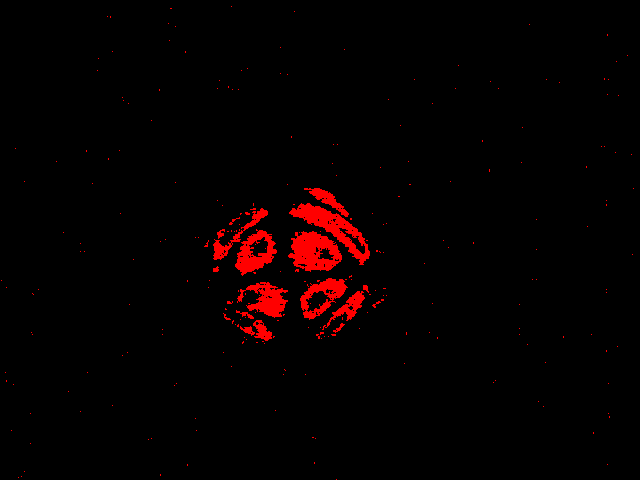

light mask


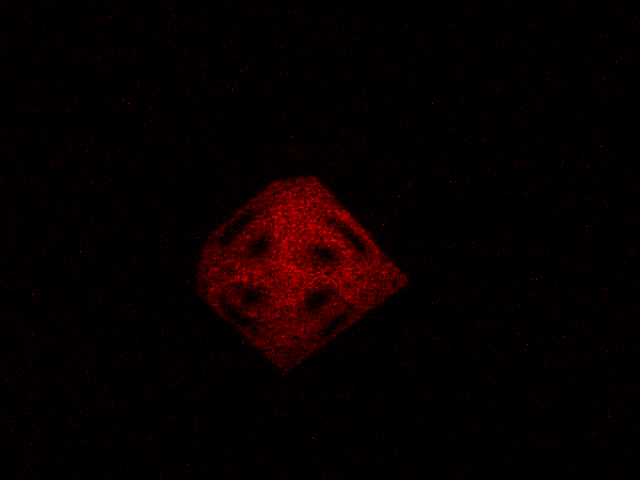

horizontal light observed


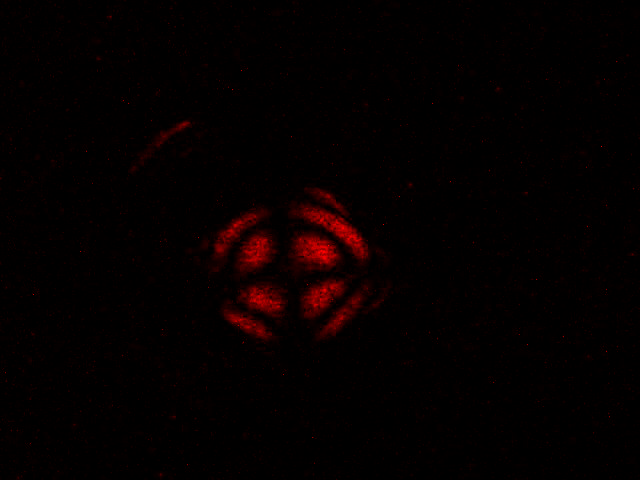

vertical light observed


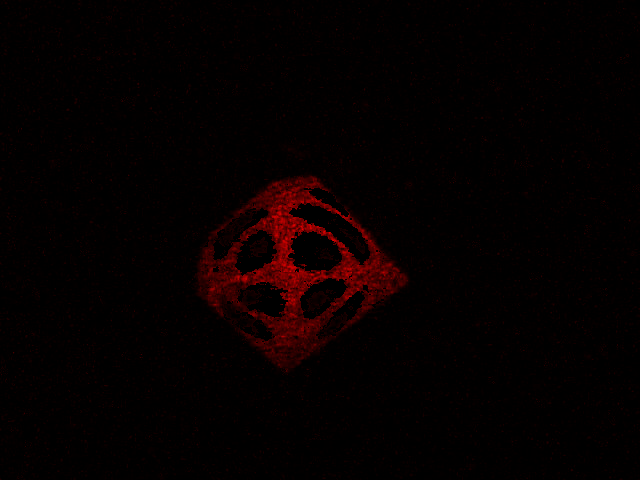

pure horizontal light


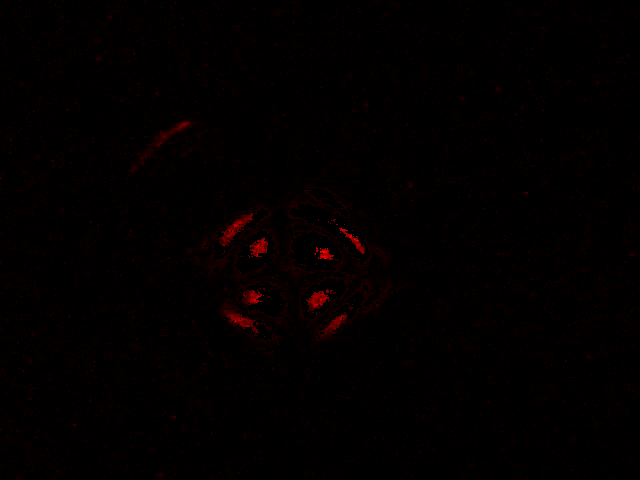

pire vertical light


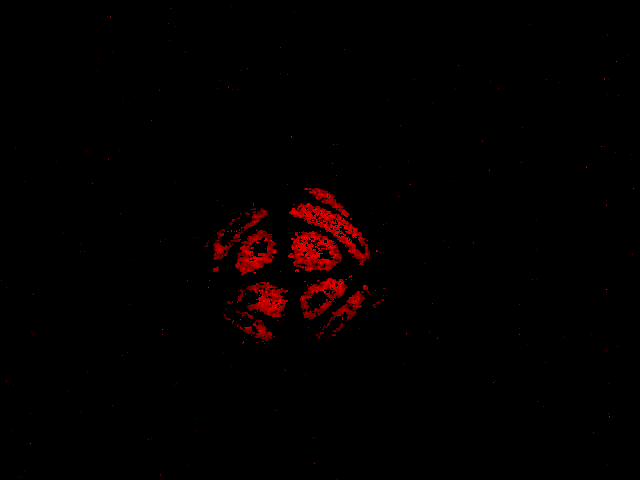

pure circular and elliptical polarisation


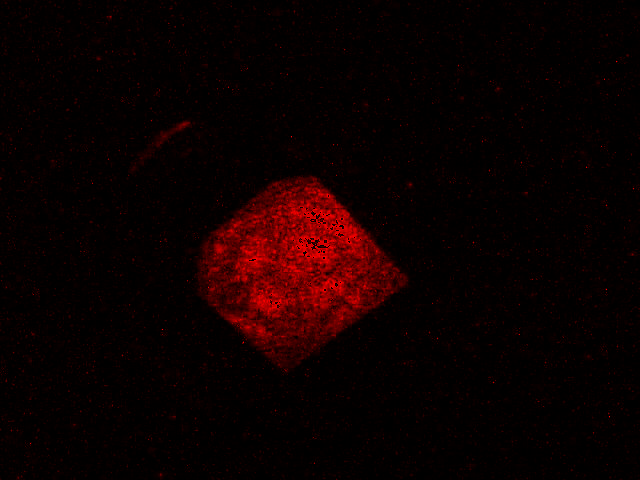

all light, unpolarised


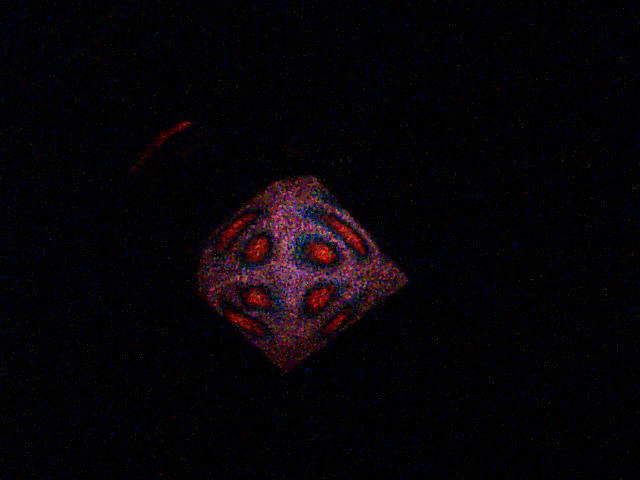

raw images subtracted


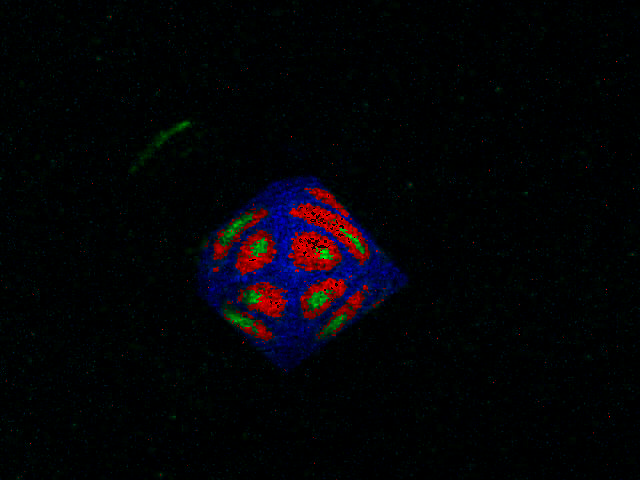

a composite image of all three lights, but in different colours for contrast


In [2]:
#open files. change directory to whatever you save the files to
#file 1 should be your horizontally polarised light
#file 2 should be your vertically polarised light
#both files need to be the same size! all the stuff I have done was with the same camera, so it will be fine
#if for whatever reason you are using this for images I have not provided, make sure that
#file 1 is strictly >= file 2 in both height and width!
file1 = Im.open("C:/Users/aupet/Desktop/Peter + Joel/part 1/horiz 1 nv.jpg")
file2 = Im.open("C:/Users/aupet/Desktop/Peter + Joel/part 1/vert 1 nv.jpg")

#dumping files into numpy arrays for manipulation
picRaw1 = np.array(file1)
picRaw2 = np.array(file2)

#getting the image heights and widths to use in for loops
h = picRaw1.shape[0]
w = picRaw1.shape[1]

#creating a bunch of empty canvases to use later. some have become obsolete
pic1 = np.zeros((h,w,3), dtype = np.uint8)
pic2 = np.zeros((h,w,3), dtype = np.uint8)
pic3 = np.zeros((h,w,3), dtype = np.uint8)
pic4 = np.zeros((h,w,3), dtype = np.uint8)
pic5 = np.zeros((h,w,3), dtype = np.uint8)
pic6 = np.zeros((h,w,3), dtype = np.uint8)
picDiff = np.zeros((h,w,3), dtype = np.uint8)
pic4b = np.zeros((h,w,3), dtype = np.uint8)
pic5g = np.zeros((h,w,3), dtype = np.uint8)



#first bit of data processing! deleting all the green and blue components.
#because our laser is in the red spectrum, most of the non red components will be
#interference from the green-blue glass of the back plate
for i in range(0,h):
    for j in range(0,w):
        pic1[i,j][0] = picRaw1[i,j][0]
        pic1[i,j][1] = 0
        pic1[i,j][2] = 0
        pic2[i,j][0] = picRaw2[i,j][0]
        pic2[i,j][1] = 0
        pic2[i,j][2] = 0

#both red-only images added together
doubleC=np.add(pic1,pic2)

#difference between each pixel in the two red-only images
deltaC=np.absolute(np.subtract(pic1,pic2))

#threshold of difference. the pixel on both images has to be greater than this for that pixel to be added to the mask.
#I found 30 to be a good value here, but you can absolutely play around with it and see what happens.
luminosityThreshold=30

#mask creation - creates an image of (0,0,0) and (255,0,0) pixels only.
for i in range(0,h):
    for j in range(0,w):
        if pic1[i,j][0] > luminosityThreshold:
            if pic2[i,j][0] > luminosityThreshold:
                picDiff[i,j][0] = 255
                
#applying the mask to the images
#pic4 is pic1, but all pixels under the mask are set to 0
#pic5 is pic2, but with the same condition-all pixels under mask = 0
#pic6 is different - it is pic1+pic2, but all pixels NOT under the mask are set to zero!
for i in range(0,h):
    for j in range(0,w):
        if picDiff[i,j][0] != 255:
            pic4[i,j][0] = pic1[i,j][0]
            pic5[i,j][0] = pic2[i,j][0]
        if picDiff[i,j][0] == 255:
            pic6[i,j][0] = doubleC[i,j][0]

for i in range(0,h):
    for j in range(0,w):
        pic4b[i,j][2]=pic4[i,j][0]
        pic4b[i,j][0]=0
        pic5g[i,j][1]=pic5[i,j][0]
        pic5g[i,j][0]=0
            
picAlla=np.add(pic4b,pic5g)
picAll = np.add(picAlla,pic6)

#making numpy arrays into actual images
idi = Im.fromarray(picDiff,"RGB")
ih = Im.fromarray(pic1,"RGB")
iv = Im.fromarray(pic2,"RGB")
im4 = Im.fromarray(pic4,"RGB")
im5 = Im.fromarray(pic5,"RGB")
im6 = Im.fromarray(pic6,"RGB")
ic = Im.fromarray(doubleC,"RGB")
icCom = Im.fromarray(picAll,"RGB")


#the difference between file 1 and 2, all three colours!
diff = ImCh.difference(file1, file2)

#printing images to screen
display(idi)
print("light mask")
display(ih)
print("horizontal light observed")
display(iv)
print("vertical light observed")
display(im4)
print("pure horizontal light")
display(im5)
print("pire vertical light")
display(im6)
print("pure circular and elliptical polarisation")
display(ic)
print("all light, unpolarised")
display(diff)
print("raw images subtracted")
display(icCom)
print("a composite image of all three light polarisations, but in different colours for contrast")

